# UNRC – TRATAMIENTO DIGITAL DE IMÁGENES
## Guia práctica Nº1

In [3]:
import cv2
from PIL import Image, ImageDraw, ImageFont
import time
import matplotlib

## Problema 1


In [ ]:
camera = cv2.VideoCapture(0)
return_value, image = camera.read()
cv2.imwrite('captura.jpg', image)
del(camera)

In [3]:
# A. Abrir la imagen "captura.jpg"
image = Image.open('captura.jpg')

# B. Imprimir dimensiones
print(f"Dimensiones de la imagen: {image.size}")

# C. Convertirla a escala de grises
grayscale_image = image.convert("L")
grayscale_image.save('captura_grayscale.jpg')

# D. Convertirla a modo binario
binary_image = grayscale_image.point(lambda x: 0 if x < 128 else 255, '1')
binary_image.save('captura_binary.jpg')

# E. Agregarle información de captura (Día, Hora y Año) y guardarla como "captura_ConInfo.jpg"
draw = ImageDraw.Draw(image)
font = ImageFont.load_default()
ahora = time.strftime("%c")
draw.text((10, 10), ahora, font=font, fill=(255, 255, 255))
image.save('captura_ConInfo.jpg')

# Mostrar la imagen con información de captura
image.show()

Dimensiones de la imagen: (640, 480)


### Imágenes Generadas

##### Imagen Original
![Imagen Original](captura.jpg)

##### Imagen en Escala de Grises
![Imagen en Escala de Grises](captura_grayscale.jpg)

##### Imagen en Modo Binario
![Imagen en Modo Binario](captura_binary.jpg)

##### Imagen con Información de Captura
![Imagen con Información de Captura](captura_ConInfo.jpg)


### Problema 1-1


#### Codigo 1

In [ ]:
import numpy as np
import cv2
cap = cv2.VideoCapture('MATI.mp4')
ret, frame = cap.read()
while ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(int(1/29.9)) & 0xFF == ord('q'):
        break
    ret, frame = cap.read()
cap.release()
cv2.destroyAllWindows()

Este código carga un video en formato MP4 y, en primer instancia, captura el primer frame del video cargado. El bucle while itera mientras haya frames disponibles, es decir, mientras ret sea True. En cada iteración, convierte el frame a escala de grises y lo muestra en una ventana. Luego, espera un tiempo determinado antes de pasar al siguiente frame, tiempo calculado para mantener la tasa de fotogramas del video. Además, verifica si se presionó la tecla "q", en cuyo caso el bucle se interrumpe y se sale del proceso de visualización. Finalmente, libera los recursos asociados al video y cierra la ventana utilizada.

#### Codigo 2

(512, 512)
(51, 51)


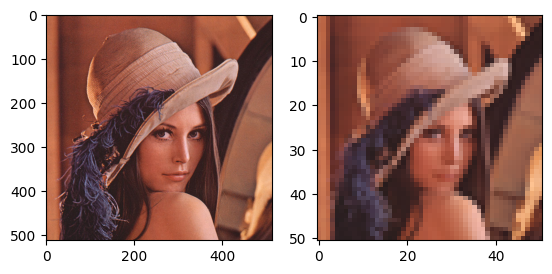

In [4]:
from PIL import Image
import requests
from matplotlib.pyplot import imshow, figure, subplot, show
url = "https://docs.opencv.org/3.4/lena.png"
im = Image.open(requests.get(url, stream=True).raw)
nx, ny = im.size
im2 = im.resize((int(nx*.10), int(ny*.10)), Image.Resampling.BICUBIC)
figure()
subplot(1,2,1)
imshow(im)
print(im.size)
subplot(1,2,2)
imshow(im2)
print(im2.size)
show()

Este código descarga una imagen desde una URL, la abre con la libreria PIL, y luego la redimensiona a un 10% de su tamaño original usando el método de interpolacion bicúbico. Depues utiliza matplotlib para crear una figura con dos subimagenes: la primera muestra la imagen original y la segunda muestra la imagen redimensionada.
Por ultimo imprime las dimensiones de ambas imágenes y muestra las subgráficas.

#### Codigo 3

In [3]:
import numpy as np
import cv2
# Open a sample video available in sample-videos
url="http://80.32.125.254:8080/cgibin/faststream.jpg?stream=half&fps=15&rand=COUNTER"
vcap = cv2.VideoCapture(url)
#if not vcap.isOpened():
# print "File Cannot be Opened"
while(True):
    # Capture frame-by-frame
    ret, frame = vcap.read()
    #print cap.isOpened(), ret
    if frame is not None:
        # Display the resulting frame
        cv2.imshow('Houston, Texas,Us',frame)
        # Press q to close the video windows before it ends if you want
        if cv2.waitKey(22) & 0xFF == ord('q'):
            break
    else:
        print ("Frame is None")
        break
# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()

Frame is None


Este código captura y muestra en tiempo real un flujo de video desde una URL y lo muestra como en el codigo 1.

## Problema 2


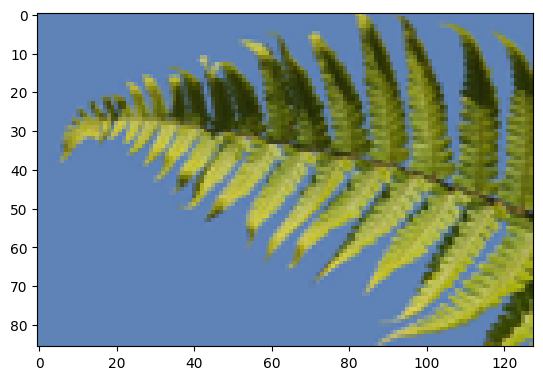

In [7]:
from PIL import Image
from PIL import ImageOps
from matplotlib.pyplot import imshow, show
pil_im = Image.open('hoja.jpg')
size=(128,128)
#USANDO RESIZE
imResize = pil_im.resize(size)
imResize.save('hojaResize.jpg')
imResize.show()
#USANDO FIT
imFit = ImageOps.fit(pil_im, size)
imFit.save('hojaFit.jpg')
imFit.show()
#USANDO THUMBNAIL
temp = pil_im.copy()
temp.thumbnail(size)
temp.save('hojaThumbnail.jpg')
temp.show()
imshow(temp)
show()

La diferencia entre los diferentes formas de **crear las minaturas** son:

*Resize:* Redimensiona la imagen a un tamaño específico sin mantener la relación de aspecto.

*ImageOps.fit:*  Recorta y redimensiona la imagen para que se ajuste a un tamaño específico manteniendo la relación de aspecto.

*Thumbnail:*  Redimensiona la imagen para que encaje dentro de un tamaño específico manteniendo la relación de aspecto sin recorte.

La diferencia entre los diferentes metodos de **mostrar la imagen** son:

*Imshow (Matplotlib):*  Muestra imágenes en un contexto gráfico(Terminal), útil para análisis y visualización científica.

*Show (PIL):*  Muestra imágenes en una ventana independiente usando el visor del sistema operativo, adecuado para visualización rápida.

## Problema 3

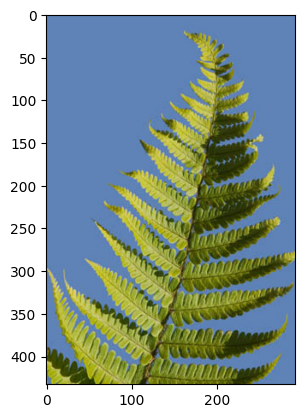

In [15]:
from PIL import Image
from matplotlib.pyplot import imshow, show

pil_im = Image.open('hoja.jpg')

rotated_im = pil_im.rotate(-90, expand=True)  # expand=True ajusta el tamaño de la imagen para que se ajuste a la nueva orientación

imshow(rotated_im)
show()

rotated_im.save('hoja_rotada.jpg', quality=90)


#### Guardar imagen con 25% de calidad

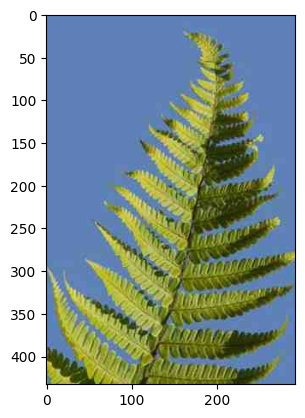

In [5]:
from PIL import Image
from matplotlib.pyplot import imshow, show
image25 = Image.open('hoja_rotada.jpg')
image25.save('hoja_25.jpg', quality=25)
image25 = Image.open('hoja_25.jpg')
imshow(image25)
show()

Si la image se guarda con un 25 de calidad, la imagen pierde mucha definicion y no se logra ver practicamente ningun detalle.

## Problema 4

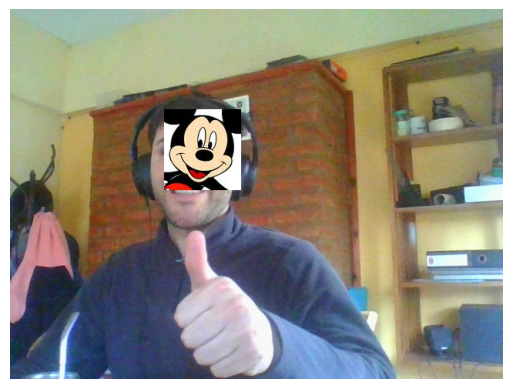

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

# Cargar las imágenes
mickey_img = Image.open("mickey.jpg")
captura_img = Image.open("captura.jpg")

# Definir las coordenadas del recorte (x, y, ancho, alto)
mickey_face_box = (40, 30, 140, 135)  
mickey_face = mickey_img.crop(mickey_face_box)

# Definir la posición para pegar la cara en la imagen de captura
paste_position = (200, 130)  

# Pegamos la cara en la imagen de captura en la posición especificada
captura_img.paste(mickey_face, paste_position)

# Mostrar el resultado usando Matplotlib
plt.imshow(captura_img)
plt.axis('off')  
plt.show()

captura_img.save("resultado.jpg")


## Problema 5

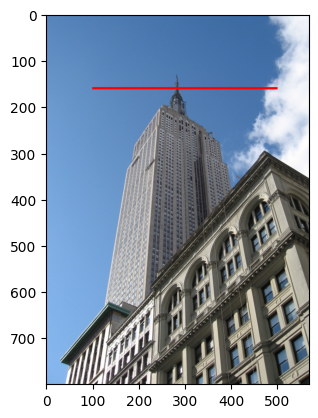

In [16]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Cargar la imagen
image = Image.open("empire.jpg")

# Crear un objeto para dibujar
draw = ImageDraw.Draw(image)

# Definir las coordenadas de la línea 
line_start = (100, 160) 
line_end = (500, 160)

# Dibujar la línea
draw.line([line_start, line_end], fill="red", width=5)  

plt.imshow(image)
plt.axis('on')  
plt.show()

# Si deseas guardar el resultado
image.save("resultado_empire.jpg")


## Problema 6

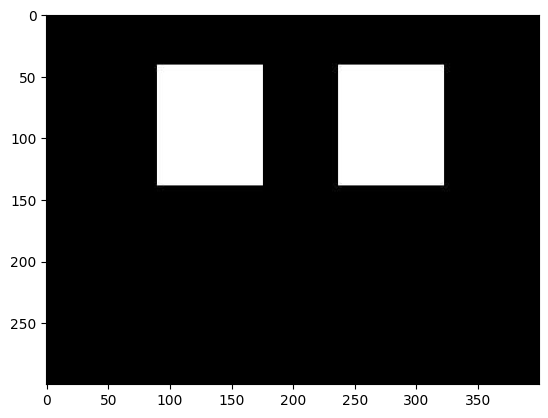

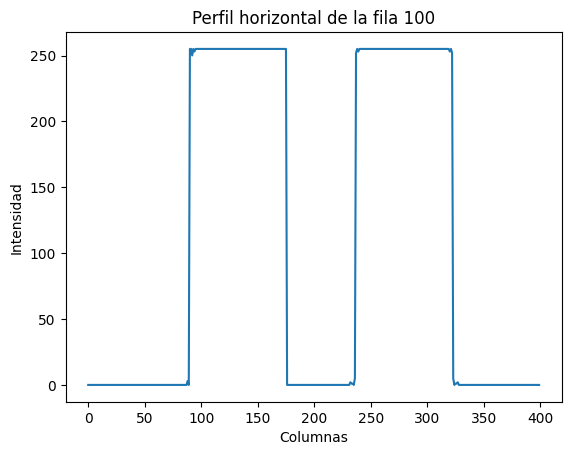

In [66]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Cargar la imagen
image = Image.open("twobox.jpg")

# Convertir a escala de grises
gray_image = image.convert("L")

# Mostrar la imagen en escala de grises
plt.imshow(gray_image, cmap='gray')
plt.axis('on')  
plt.show()

# Obtener el perfil horizontal de la fila 100
profile_row = 100  
profile = np.array(gray_image)[profile_row]

# Mostrar el perfil horizontal
plt.plot(profile)
plt.title(f'Perfil horizontal de la fila {profile_row}')
plt.xlabel('Columnas')
plt.ylabel('Intensidad')
plt.show()

# Guardar el perfil en un archivo usando pickle
with open("profile_row_100.pkl", "wb") as f:
    pickle.dump(profile, f)

**1- ¿Puede obtener el tamaño relativo en pixeles de los cuadrados? (aproximado)**

Si, aproximadamente serian 90 pixeles por lado.

**2- utilizando la función “pickle” ¿Cómo haría para volver a cargar dichos datos en un programa
nuevo? Mostrarlos.**

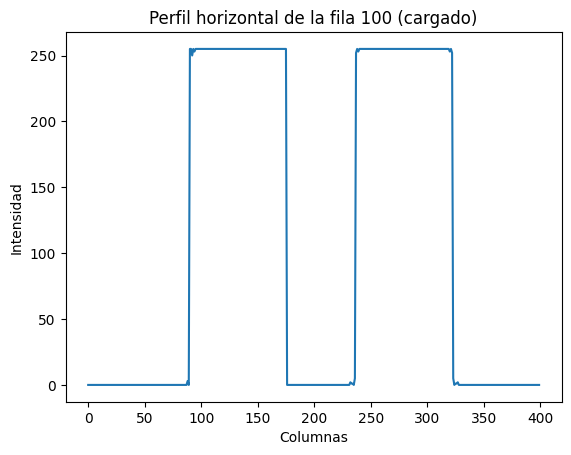

In [62]:
import pickle
import matplotlib.pyplot as plt

# Cargar el perfil desde el archivo
with open("profile_row_100.pkl", "rb") as f:
    loaded_profile = pickle.load(f)

# Mostrar el perfil cargado
plt.plot(loaded_profile)
plt.title('Perfil horizontal de la fila 100 (cargado)')
plt.xlabel('Columnas')
plt.ylabel('Intensidad')
plt.show()


**3- Comparar modulo “pickle” de python con las funciones “loadtxt” y “savetxt” de la librería Numpy.**

El módulo **pickle** y las funciones savetxt y loadtxt de NumPy son herramientas distintas para manejar datos en Python. pickle permite la serialización de casi cualquier objeto de Python, incluidos tipos de datos complejos como listas y diccionarios, generando **archivos binarios** que no son legibles por humanos y que pueden no ser portables entre versiones de Python. Por otro lado, savetxt y loadtxt están diseñadas específicamente para manejar arreglos numéricos, creando archivos de texto legibles que son fáciles de intercambiar entre diferentes plataformas y lenguajes. Mientras que pickle ofrece mayor flexibilidad en el tipo de datos que puede almacenar.

In [67]:
from PIL import Image
import numpy as np
import pickle

# Cargar la imagen
image = Image.open("twobox.jpg")

# Convertir a escala de grises y obtener el perfil horizontal de la fila 100
gray_image = image.convert("L")
profile_row = 100
profile = np.array(gray_image)[profile_row]

# 1. Guardar el perfil en un archivo usando pickle
with open("profile_row_100.pkl", "wb") as f:
    pickle.dump(profile, f)

# 2. Cargar el perfil desde el archivo usando pickle
with open("profile_row_100.pkl", "rb") as f:
    loaded_profile = pickle.load(f)

# 3. Guardar el perfil en un archivo usando numpy
np.savetxt("profile_row_100.txt", profile)

# 4. Cargar el perfil desde el archivo usando numpy
loaded_profile_np = np.loadtxt("profile_row_100.txt")


## Problema 7

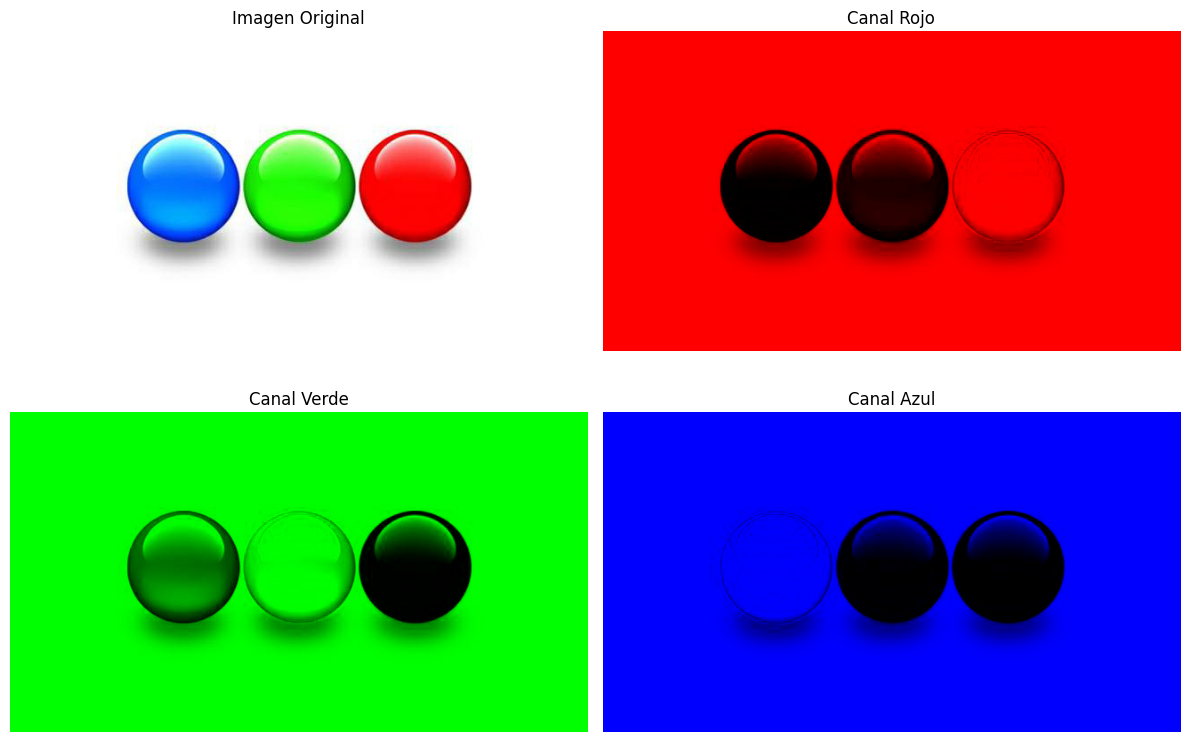

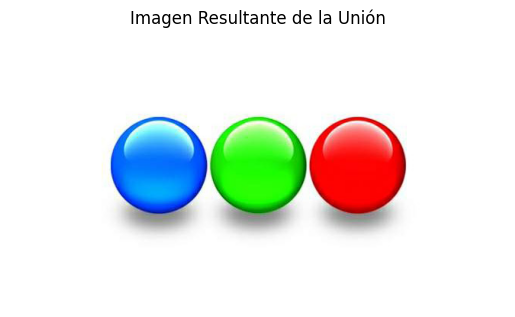

In [69]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = Image.open("telefe.jpg")

# Convertir la imagen a un arreglo NumPy
image_array = np.array(image)

# Separar los canales R, G, B
R = image_array[:, :, 0]  # Canal rojo
G = image_array[:, :, 1]  # Canal verde
B = image_array[:, :, 2]  # Canal azul

# Crear imágenes a partir de los canales
R_image = np.zeros_like(image_array)
G_image = np.zeros_like(image_array)
B_image = np.zeros_like(image_array)

R_image[:, :, 0] = R  # Solo canal rojo
G_image[:, :, 1] = G  # Solo canal verde
B_image[:, :, 2] = B  # Solo canal azul

# Unir los canales de nuevo
merged_image = R_image + G_image + B_image

# Mostrar las imágenes
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(R_image)
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(G_image)
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(B_image)
plt.title('Canal Azul')
plt.axis('off')

plt.tight_layout()
plt.show()

# Mostrar la imagen resultante de la unión
plt.figure()
plt.imshow(merged_image)
plt.title('Imagen Resultante de la Unión')
plt.axis('off')
plt.show()


## Problema 8

In [38]:
from PIL import Image

# Abrir la imagen
img = Image.open('fruta_mejorada_brillo_contraste.png')

# Convertir a RGB primero si la imagen está en escala de grises
if img.mode == 'L':
    img = img.convert('RGB')

# Convertir a diferentes espacios de color
rgb = img.convert('RGB')
hsv = img.convert('HSV')
lab = rgb.convert('LAB')
cmyk = img.convert('CMYK')

# Guardar las imágenes convertidas
rgb.save('fruta_rgb.png')
hsv.convert('RGB').save('fruta_hsv_as_rgb.png')  # Convertir HSV a RGB antes de guardar
lab.convert('RGB').save('fruta_lab_as_rgb.png')  # Convertir LAB a RGB antes de guardar
cmyk.convert('RGB').save('fruta_cmyk_as_rgb.png')  # Convertir CMYK a RGB antes de guardar

print("Conversiones completadas y guardadas.")

# Mostrar las imágenes
img.show(title="Original")
rgb.show(title="RGB")
hsv.show(title="HSV")
lab.show(title="LAB")
cmyk.show(title="CMYK")


Conversiones completadas y guardadas.
Las imágenes se han abierto en ventanas separadas.


## Problema 9

**La imagen “fruta.tif” fue obtenida de un sensor electrónico como parte de un sistema de control de
calidad de fruta. Sin embargo, como puede apreciarse, la visualización de esta imagen no es buena.
¿Puede Ud. como Ingeniero detectar la razón de dicha dificultad para visualizar la imagen y
corregirla?**

El histograma original mostraba una concentración alta de píxeles en los valores más brillantes, indicando una imagen sobreexpuesta con poco contraste. Al aplicar una correccion del brillo de 0.6, se redujo significativamente el brillo general, desplazando la distribución de píxeles hacia valores más bajos.
El factor de contraste de 10, aunque alto, expandió  la distribución de píxeles a lo largo de todo el rango de valores. Esto resultó en un histograma mucho más amplio para la imagen ajustada, lo que sugiere un mejor uso del rango dinámico disponible. La imagen resultante probablemente tiene mucho más contraste y detalle visible que la original,logrando una correcta recuperacion de la misma.

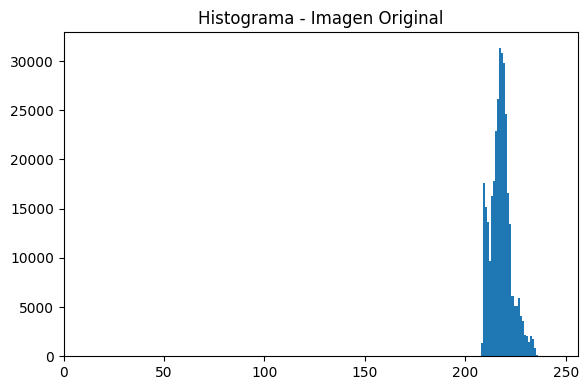

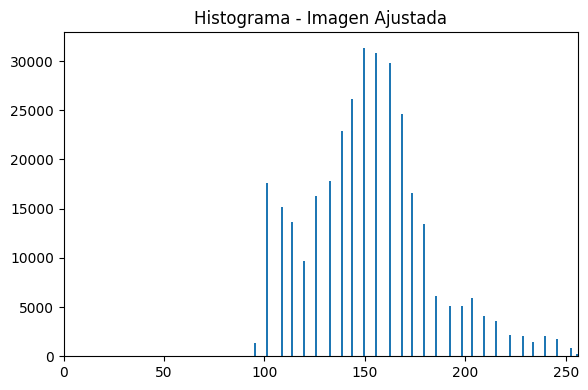

In [26]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def adjust_brightness_contrast(image, brightness_factor, contrast_factor):
    img_array = np.array(image).astype(float)
    img_array = img_array * brightness_factor
    img_array = (img_array - 128) * contrast_factor + 128
    img_array = np.clip(img_array, 0, 255).astype(np.uint8)
    return Image.fromarray(img_array)

def show_histogram(image, title):
    plt.figure(figsize=(6, 4))
    plt.hist(np.array(image).ravel(), bins=256, range=[0, 256])
    plt.title(f'Histograma - {title}')
    plt.xlim([0, 256])
    plt.tight_layout()
    plt.show()

# Cargar la imagen
img = Image.open('fruta.tif').convert('L')

# Ajustar el brillo y el contraste
brightness_factor = 0.6
contrast_factor = 10
img_adjusted = adjust_brightness_contrast(img, brightness_factor, contrast_factor)

# Mostrar la imagen original
img.show(title='Imagen Original')
# Mostrar el histograma de la imagen original
show_histogram(img, 'Imagen Original')

# Mostrar la imagen ajustada
img_adjusted.show(title='Imagen Ajustada')
# Mostrar el histograma de la imagen ajustada
show_histogram(img_adjusted, 'Imagen Ajustada')

# Guardar la imagen mejorada
img_adjusted.save('fruta_mejorada_brillo_contraste.png')

## Problema 10

**Algoritmo de clasificación de imágenes de letras**

**Etapa 1: Estandarización de la imagen**

En esta etapa, se realiza la estandarización de la imagen de entrada para asegurar que todas las imágenes tengan el mismo tamaño y estén centradas. Los pasos son los siguientes:

1. Abrir la imagen y convertirla a modo binario (blanco y negro).
2. Redimensionar la imagen a un tamaño específico (por ejemplo, 100x100 píxeles).
3. Calcular el centro de masa de los píxeles negros en la imagen.
4. Recortar la imagen para centrarla alrededor del centro de masa.
5. Si la imagen recortada es más pequeña que el tamaño especificado, rellenar con fondo blanco para mantener las dimensiones.

El resultado de esta etapa es una imagen estandarizada que se utilizará para el cálculo de indicadores y la clasificación.

**Etapa 2: Cálculo de indicadores**

En esta etapa, se calculan diferentes indicadores a partir de la imagen estandarizada para extraer características relevantes que ayuden en la clasificación de las letras. Los indicadores calculados son los siguientes:

1. **Centro ratio**: Proporción de píxeles negros en la región central de la imagen (un cuadrado del 50% de ancho y alto centrado en la imagen).
2. **Top-bottom difference**: Diferencia absoluta entre la cantidad de píxeles negros en la mitad superior y la mitad inferior de la imagen.
3. **Left-right difference**: Diferencia absoluta entre la cantidad de píxeles negros en el lado izquierdo y el lado derecho de la imagen.

Estos indicadores capturan información sobre la distribución espacial de los píxeles negros en diferentes regiones de la imagen, lo que ayuda a distinguir entre las letras A, B y C.

**Etapa 3: Clasificación de la letra**

En esta etapa, se utiliza la lógica de clasificación basada en los indicadores calculados para determinar la letra correspondiente a la imagen. Los criterios de clasificación son los siguientes:

1. Si el centro ratio es mayor a 0.3 y la diferencia top-bottom es mayor a 150, se clasifica como letra 'A'.
2. Si el centro ratio es mayor a 0.25 y la diferencia top-bottom es menor a 30, se clasifica como letra 'B'.
3. Si el centro ratio es menor a 0.2 y la diferencia left-right es menor a 400, se clasifica como letra 'C'.
4. Si ninguno de los criterios anteriores se cumple, se clasifica como 'Unknown' (desconocido).

Estos criterios se basan en los valores observados de los indicadores para las imágenes de prueba proporcionadas y pueden requerir ajustes adicionales si se introducen nuevas imágenes con variaciones significativas.

**Consideraciones adicionales**

- **Este algoritmo está diseñado específicamente para clasificar imágenes de las letras A, B y C, utilizando las imágenes de prueba proporcionadas como referencia.**
- Los valores de umbral utilizados en los criterios de clasificación pueden necesitar ajustes si se agregan nuevas imágenes o si hay variaciones significativas en las letras.
- Si se requiere una mayor robustez o flexibilidad en la clasificación, se pueden considerar técnicas adicionales como el aprendizaje automático supervisado o la extracción de características más avanzadas.

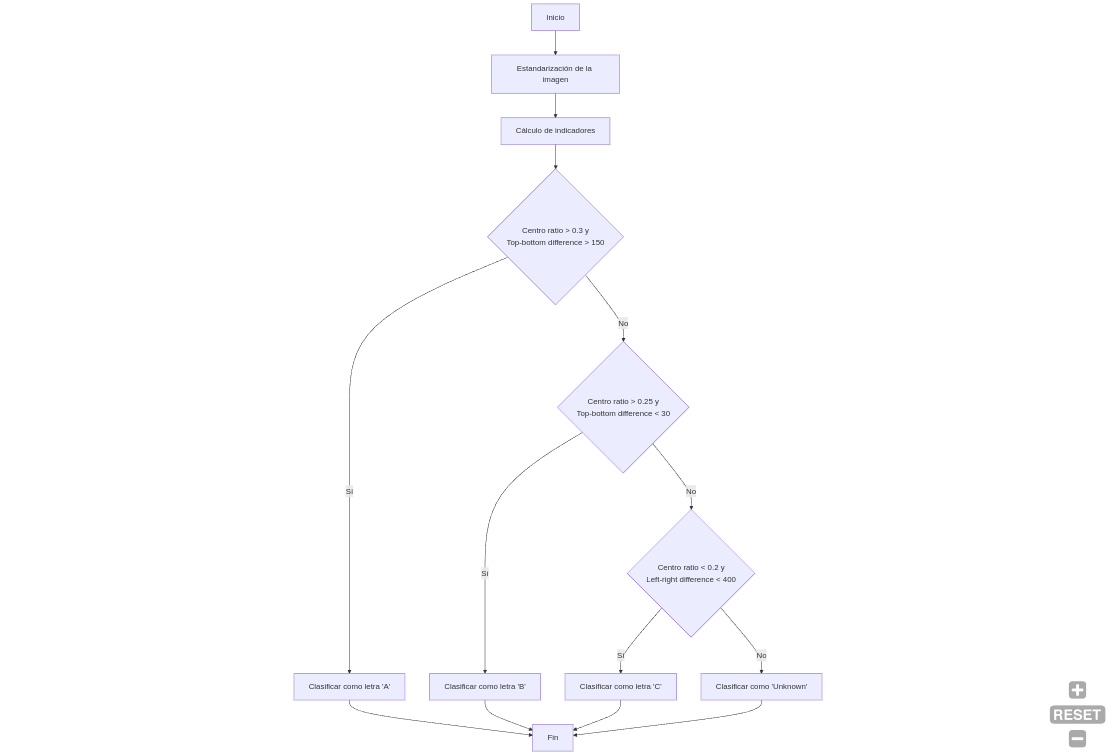

**Primer ejecucion para obtener los indicadores y luego observandolos ajustarlos para que detecte correctamente.**

In [111]:
from PIL import Image

def standardize_image(image_path, size=(100, 100)):
    with Image.open(image_path) as img:
        img = img.convert('1')  # Convertir a modo binario (blanco y negro)
        
        # Redimensionar la imagen al tamaño especificado
        img = img.resize(size)
        
        # Calcular el centro de masa de los píxeles negros
        width, height = img.size
        black_pixels = [(x, y) for x in range(width) for y in range(height) if img.getpixel((x, y)) == 0]
        x_center = sum(x for x, _ in black_pixels) / len(black_pixels)
        y_center = sum(y for _, y in black_pixels) / len(black_pixels)
        
        # Calcular las coordenadas para recortar y centrar la imagen
        left = max(0, int(x_center - width/2))
        top = max(0, int(y_center - height/2))
        right = min(width, int(x_center + width/2))
        bottom = min(height, int(y_center + height/2))
        
        # Recortar y centrar la imagen
        img = img.crop((left, top, right, bottom))
        
        # Rellenar con fondo blanco si la imagen recortada es más pequeña que el tamaño especificado
        if img.size != size:
            new_img = Image.new('1', size, 1)
            offset_x = (size[0] - img.size[0]) // 2
            offset_y = (size[1] - img.size[1]) // 2
            new_img.paste(img, (offset_x, offset_y))
            img = new_img
        
        return img

def center_ratio(img):
    width, height = img.size
    center_square = img.crop((width//4, height//4, 3*width//4, 3*height//4))
    center_pixels = center_square.getdata()
    black_pixels = sum(pixel == 0 for pixel in center_pixels)
    total_pixels = width // 2 * height // 2
    return black_pixels / total_pixels

def top_bottom_diff(img):
    width, height = img.size
    top_half = img.crop((0, 0, width, height//2))
    bottom_half = img.crop((0, height//2, width, height))
    top_black = sum(pixel == 0 for pixel in top_half.getdata())
    bottom_black = sum(pixel == 0 for pixel in bottom_half.getdata())
    return abs(top_black - bottom_black)

def left_right_diff(img):
    width, height = img.size
    left_half = img.crop((0, 0, width//2, height))
    right_half = img.crop((width//2, 0, width, height))
    left_black = sum(pixel == 0 for pixel in left_half.getdata())
    right_black = sum(pixel == 0 for pixel in right_half.getdata())
    return abs(left_black - right_black)

def classify_letter(img):
    if center_ratio(img) > 0.6:
        return 'A'
    elif top_bottom_diff(img) < 100:
        return 'B'
    elif left_right_diff(img) > 200:
        return 'C'
    else:
        return 'Unknown'

# Calculo de indicadores
letters = ['A', 'B', 'C']
for letter in letters:
    image_path = f'{letter}.jpg'
    standardized_img = standardize_image(image_path)
    
    center = center_ratio(standardized_img)
    top_bottom = top_bottom_diff(standardized_img)
    left_right = left_right_diff(standardized_img)
    
    print(f"Image: {image_path}")
    print(f"Center Ratio: {center:.3f}")
    print(f"Top-Bottom Difference: {top_bottom}")
    print(f"Left-Right Difference: {left_right}")
    print("---")

Image: A.jpg
Center Ratio: 0.336
Top-Bottom Difference: 201
Left-Right Difference: 475
---
Image: B.jpg
Center Ratio: 0.308
Top-Bottom Difference: 21
Left-Right Difference: 469
---
Image: C.jpg
Center Ratio: 0.147
Top-Bottom Difference: 27
Left-Right Difference: 353
---


**Ajuste de los umbrales de los indicadores y correcta deteccion**

In [113]:
def classify_letter(img):
    center = center_ratio(img)
    top_bottom = top_bottom_diff(img)
    left_right = left_right_diff(img)

    if center > 0.3 and top_bottom > 150:
        return 'A'
    elif center > 0.25 and top_bottom < 30:
        return 'B'
    elif center < 0.2 and left_right < 400:
        return 'C'
    else:
        return 'Unknown'

# Clasificacion
letters = ['A', 'B', 'C']
for letter in letters:
    image_path = f'{letter}.jpg'
    standardized_img = standardize_image(image_path)
    classified_letter = classify_letter(standardized_img)
    print(f"Image: {image_path}, Classified as: {classified_letter}")

Image: A.jpg, Classified as: A
Image: B.jpg, Classified as: B
Image: C.jpg, Classified as: C


## Problema 11

**Realizar 3 fotos con la misma exposición con distintos parámetros (configuraciones) del triángulo de
exposición.**

Configuraciones utilizadas

**Foto de referencia:**

* ISO: 800
* Velocidad: 1/250
* EV: +0.3


**Primera variación:**

* ISO: 400 (reducido a la mitad)
* Velocidad: 1/125 (reducida a la mitad)
* EV: +0.3


**Segunda variación:**

* ISO: 1600 (duplicado)
* Velocidad: 1/500 (duplicada)
* EV: +0.3


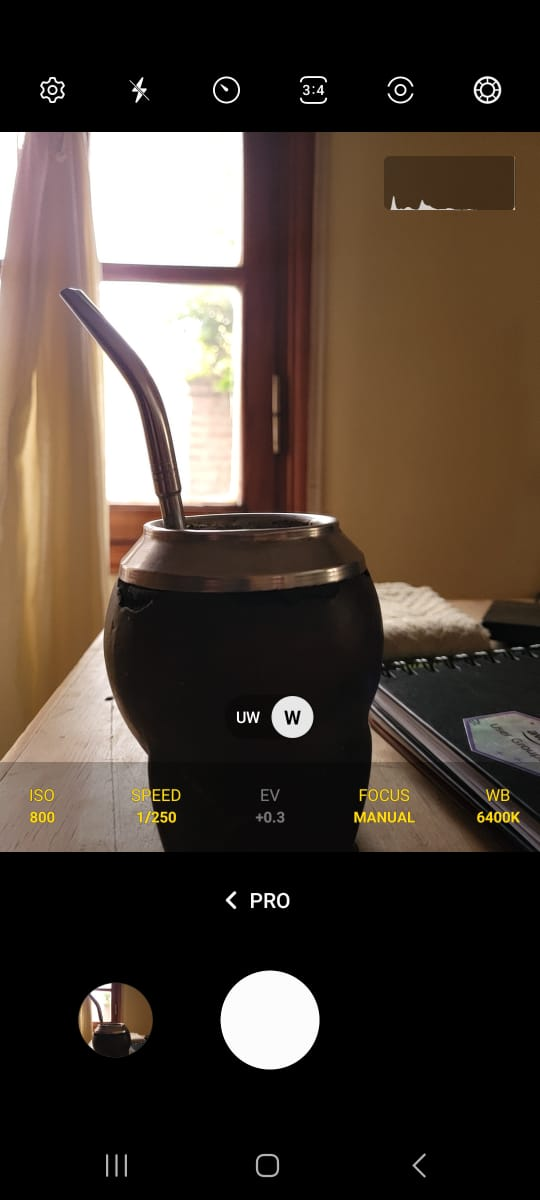
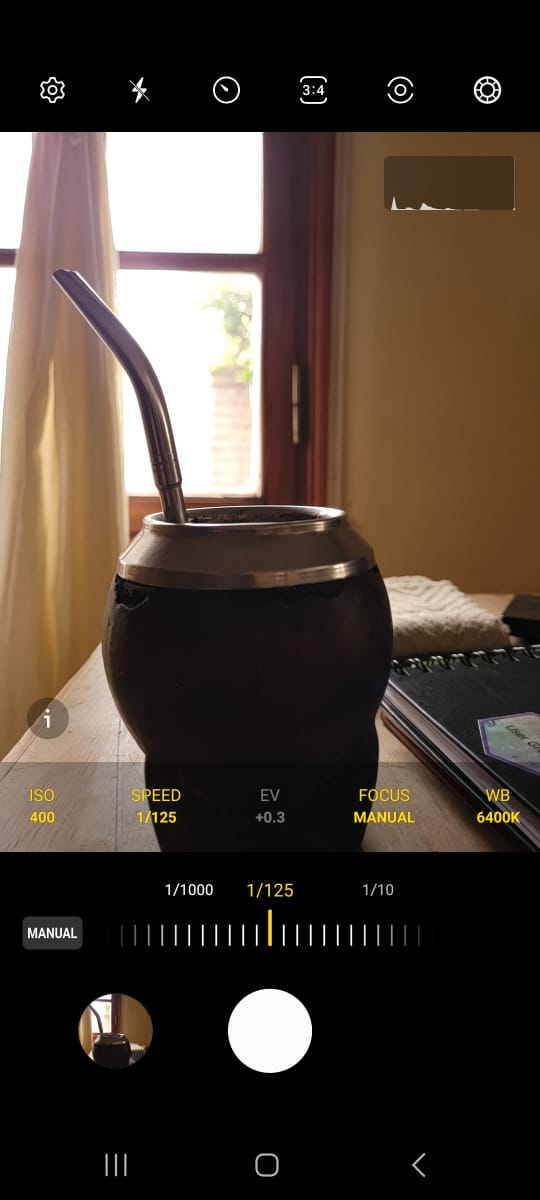
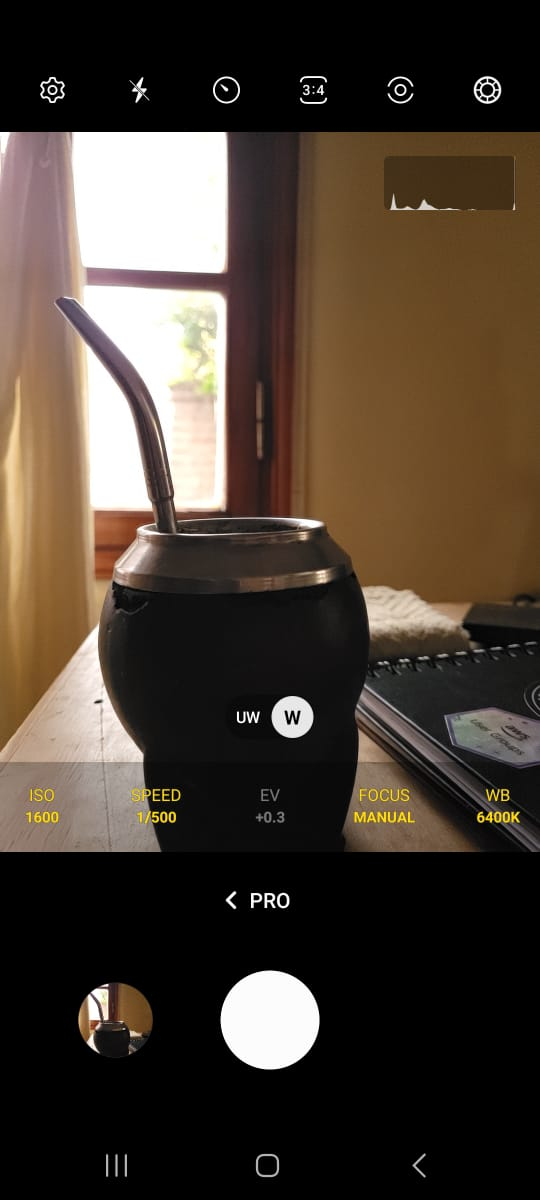


## Problema 12

**Tomar una imagen bien expuesta. Realizar una compresión. Posteriormente realizar una comparación
de calidad de imagen.**

Luego de la implementacion, se nota una gran disminucion del tamaño de las imagenes, pero en cuanto a visibilidad a simple vista no se denotan grandes cambios.

### Implementacion

Calidad: 90
Similitud: 99.99%
Reducción de tamaño: 35.61%
Imagen guardada en: compressed_image_90.jpg
--------------------
Calidad: 80
Similitud: 99.97%
Reducción de tamaño: 59.88%
Imagen guardada en: compressed_image_80.jpg
--------------------
Calidad: 70
Similitud: 99.96%
Reducción de tamaño: 70.82%
Imagen guardada en: compressed_image_70.jpg
--------------------
Calidad: 60
Similitud: 99.96%
Reducción de tamaño: 76.36%
Imagen guardada en: compressed_image_60.jpg
--------------------
Calidad: 50
Similitud: 99.95%
Reducción de tamaño: 80.90%
Imagen guardada en: compressed_image_50.jpg
--------------------
Imágenes comprimidas guardadas en:
compressed_image_90.jpg
compressed_image_80.jpg
compressed_image_70.jpg
compressed_image_60.jpg
compressed_image_50.jpg


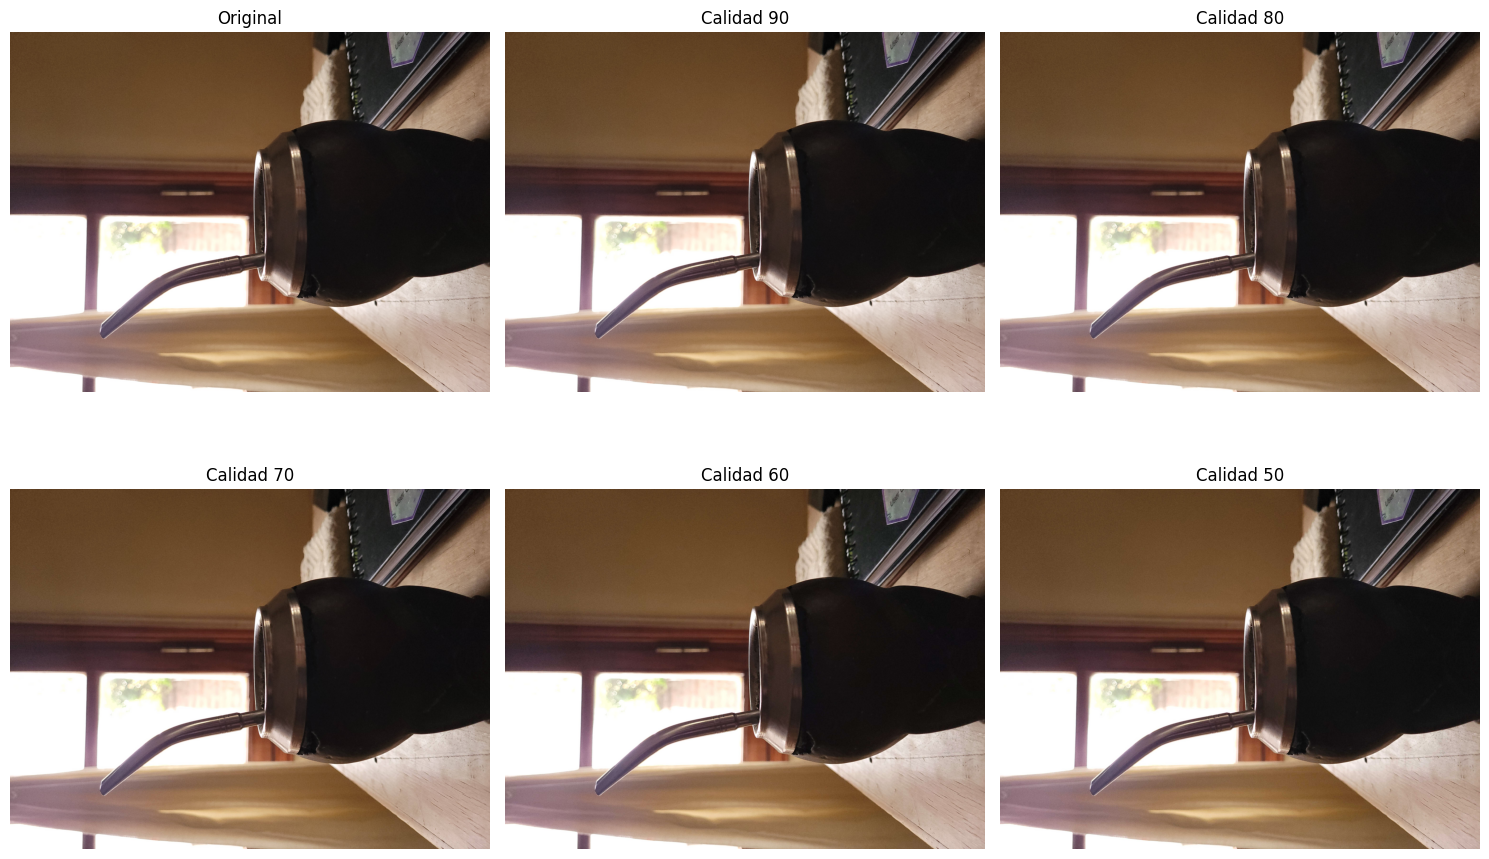

In [15]:
from PIL import Image
import os
import numpy as np

def compress_image(input_path, output_path, quality):
    with Image.open(input_path) as img:
        img.save(output_path, 'JPEG', quality=quality)
    return output_path

def compare_images(img1_path, img2_path):
    with Image.open(img1_path) as img1, Image.open(img2_path) as img2:
        if img1.size != img2.size or img1.mode != img2.mode:
            return None
        
        diff = np.array(img1) - np.array(img2)
        mse = np.square(diff).mean()
        if mse == 0:
            return 100
        return 100 - (mse / 255)

# Ruta de la imagen original
original_image_path = 'mate.jpg'

# Compresión a diferentes niveles de calidad
quality_levels = [90, 80, 70, 60, 50]

compressed_images = []

for quality in quality_levels:
    compressed_image_path = f'compressed_image_{quality}.jpg'
    output_path = compress_image(original_image_path, compressed_image_path, quality)
    compressed_images.append(output_path)
    
    similarity = compare_images(original_image_path, compressed_image_path)
    
    original_size = os.path.getsize(original_image_path)
    compressed_size = os.path.getsize(compressed_image_path)
    size_reduction = (1 - compressed_size / original_size) * 100
    
    print(f"Calidad: {quality}")
    print(f"Similitud: {similarity:.2f}%")
    print(f"Reducción de tamaño: {size_reduction:.2f}%")
    print(f"Imagen guardada en: {compressed_image_path}")
    print("--------------------")

print("Imágenes comprimidas guardadas en:")
for img_path in compressed_images:
    print(img_path)

# Intenta mostrar las imágenes si es posible
try:
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    axs = axs.ravel()

    with Image.open(original_image_path) as img:
        axs[0].imshow(img)
        axs[0].set_title("Original")
        axs[0].axis('off')

    for i, img_path in enumerate(compressed_images, 1):
        with Image.open(img_path) as img:
            axs[i].imshow(img)
            axs[i].set_title(f"Calidad {quality_levels[i-1]}")
            axs[i].axis('off')

    plt.tight_layout()
    plt.show()
except ImportError:
    print("Matplotlib no está instalado. No se pueden mostrar las imágenes directamente.")
    print("Por favor, revisa las imágenes guardadas en las rutas proporcionadas.")